<a href="https://colab.research.google.com/github/Ganesh-VG/Ganesh_Projects/blob/main/_DataScience_Web_Scraping_and_data_wrangling_on_top_movies_and_TV_show_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the project.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install wordcloud

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
movie_soup=BeautifulSoup(page.text,'html.parser')

# Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Movie URL's**

In [ ]:
# fetching href data of each page and appending it with required prefix.
movie_url = ["https://www.justwatch.com" + url["href"] for url in movie_soup.find_all("a", class_ = "title-list-grid__item--link")]
print(movie_url)

['https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/dune-2021', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/salaar', 'https://www.justwatch.com/in/movie/poor-things', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/dunki', 'https://www.justwatch.com/in/movie/the-kerala-story', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/sam-bahadur', 'https://www.justwatch.com/in/movie/eagle-2024', 'https://www.justwatch.com/in/movie/article-370', 'https://www.justwatch.com/in/movie/merry-christmas-2024', 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/captain-miller', 'https://www.justwatch.com/in/movie/ayalaan', 'https://www.justwatch.com/in/movie/bramayugam', 'https://www.justwatch.com/in/movie/ssmb-28', 'https://www.justwatch.com/in

## **Getting movies data**

In [ ]:
movie_data = []

for url in movie_url[:50]:
    while True:
        page = requests.get(url)

        if page.status_code == 200:
            # If the request is successful, append the response to Tv_show_data and break the loop
            movie_data.append(page)
            break
        elif page.status_code == 429:
            # If the status code is 429, wait for a while and then retry
            print("Too many requests. Waiting before retrying...")
            time.sleep(10)  # You can adjust the sleep time as needed
        else:
            # Handle other status codes if needed
            print("Unexpected status code:", page.status_code)
            break

print(movie_data)

Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <

## **Scrapping Movie Title**

In [ ]:
movie_dataset = {}
movie_title = []

for page in movie_data:
  # Parsing the HTML content using BeautifulSoup from the 'movie_data'
  soup_movies = BeautifulSoup(page.text,'html.parser')

  # append title from extracted data into a list
  movie_title.append(soup_movies.find("h1").text.strip().split(" (")[0].strip())

# adding list of all movies into dictionary with appropriate key
movie_dataset["Movie Title"] = movie_title

## **Scrapping release Year**

In [ ]:
movie_release_year = []

for page in movie_data:
  # Parsing the HTML content using BeautifulSoup from the 'movie_data'
  soup_movies = BeautifulSoup(page.text,'html.parser')

  year_data = soup_movies.find("h1").text.strip().split(" (")[1].strip(")")

  # append release year from extracted data into a list
  movie_release_year.append(datetime.strptime(year_data, '%Y').year)

# adding list of all movies into dictionary with appropriate key
movie_dataset["Movie Release Year"] = movie_release_year

## **Scraping Movie Details**

In [ ]:
'''
This step avoids repeatative scraping of html file for data
which will make the further code more efficient and
less time consuming.It also avoids mismatch of data.
'''
movie_details = []

for page in movie_data:
  each_movie = {} # initialising dictionary
  soup_movies = BeautifulSoup(page.text,'html.parser')

  # scraping subheadings of details into a list
  detail_head = [data.text[:19].strip() for data in soup_movies.find("div", class_ = "title-info title-info").find_all("h3", class_ = "detail-infos__subheading")]

  # scraping details into the list
  details_tail = [data.text.strip() for data in soup_movies.find("div", class_ = "title-info title-info").find_all("div", class_ = "detail-infos__value")]

  # assigning subheading as dictionary keys and respective details as dictionary values
  for i in range(len(detail_head)):
    each_movie[detail_head[i]] = details_tail[i]

  # appending dictionary of each movie details into a list for further use
  movie_details.append(each_movie)

print(movie_details)

[{'Streaming Charts': '02. +1', 'Rating': '8.4  (680k)', 'Genres': 'Drama, History', 'Runtime': '3h 0min', 'Age rating': 'UA', 'Production country': 'United States, United Kingdom', 'Director': 'Christopher Nolan'}, {'Streaming Charts': '06. +2', 'Rating': '8.0  (813k)', 'Genres': 'Science-Fiction, Action & Adventure, Drama', 'Runtime': '2h 35min', 'Age rating': 'UA', 'Production country': 'United States', 'Director': 'Denis Villeneuve'}, {'Rating': '8.4  (18k)', 'Genres': 'Action & Adventure, Comedy, Science-Fiction, Fantasy', 'Runtime': '2h 39min', 'Age rating': 'UA', 'Production country': 'India', 'Director': 'Prasanth Varma'}, {'Streaming Charts': '08. -1', 'Rating': '6.3  (85k)', 'Genres': 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Runtime': '3h 21min', 'Age rating': 'A', 'Production country': 'India', 'Director': 'Sandeep Reddy Vanga'}, {'Streaming Charts': '29. +26', 'Rating': '6.5  (61k)', 'Genres': 'Mystery & Thriller, Action & Adventure, Crime, Drama', 'Runtime'

## **Scrapping Genres**

In [ ]:
# Fetching data directly from list created by scraping and storing into a Dictionary
movie_genres = [key.get('Genres') for key in movie_details]

movie_dataset["Movie Genres"] = movie_genres

## **Scrapping IMBD Rating**

In [ ]:
# Fetching rating data and storing it as float datatype.
movie_imdb_rating = [None if len(key.get('Rating')) == 0 else float(key.get('Rating').strip().split(" ")[0]) for key in movie_details]

movie_dataset["Movie IMDB Rating"] = movie_imdb_rating

## **Scrapping Runtime/Duration**

In [ ]:
def convert_duration_to_timedelta(time_str):
  '''
  function that convert raw time data into a standard format
  input : 3h 0min
  output : 03:00:00
  '''
  # Split the string into hours and minutes parts
  time_parts = time_str.split()

  # Initialize hours and minutes
  hours = 0
  minutes = 0

  # Loop through the time parts to extract hours and minutes
  for part in time_parts:
      if 'h' in part:
          hours = int(part.strip('h'))
      elif 'min' in part:
          minutes = int(part.strip('min'))

  # Create a datetime object with the given hours and minutes
  time_obj = datetime.strptime(f'{hours}:{minutes}', '%H:%M').time()

  return(time_obj)

In [ ]:
'''
extract runtime of each movie from data pass it onto
'convert_duration_to_timedelta()' function and append the output into a list.
'''
movie_runtime = [str(convert_duration_to_timedelta(key.get('Runtime')))  for key in movie_details]

movie_dataset["Movie Runtime"] = movie_runtime

## **Scrapping Age Rating**

In [ ]:
# Extract Age rating of each movie if available and append it into a list.
movie_age_rating = [key.get('Age rating') for key in movie_details]

movie_dataset["Movie Age Rating"] = movie_age_rating

## **Fetching Production Countries Details**

In [ ]:
# extract details about where the movie was produced and append it into list
movie_production_countries = [key.get('Production country') for key in movie_details]

movie_dataset["Movie Production Countries"] = movie_production_countries

## **Fetching Streaming Service Details**

In [ ]:
# extract Streaming Service details and append it into list
movie_stream_services = []

for page in movie_data:
  soup_movies = BeautifulSoup(page.text,'html.parser')

  # if the attribute the code is looking for is not present in the website it will append none
  try:
    # if multiple streaming services are available for single movie it will append each into a list
    movie_stream_services.append([ data["alt"] for data in soup_movies.find("div", class_ = "buybox-row stream").find_all("img", class_ = "offer__icon")])
  except AttributeError:
    movie_stream_services.append(None)

# after getting data for each movie it append data into main list
movie_stream_services_join = [None if data == None else ", ".join(data) if len(data) > 1 else data[0] for data in movie_stream_services]

movie_dataset["Movie Stream Services"] = movie_stream_services_join

## **Now Creating Movies DataFrame**

In [ ]:
# convert dictionary dataset into a dataframe
movie_df = pd.DataFrame(movie_dataset)
movie_df

,Movie Title,Movie Release Year,Movie Genres,Movie IMDB Rating,Movie Runtime,Movie Age Rating,Movie Production Countries,Movie Stream Services
0,Oppenheimer,2023,"Drama, History",8.4,03:00:00,UA,"United States, United Kingdom",Jio Cinema
1,Dune,2021,"Science-Fiction, Action & Adventure, Drama",8.0,02:35:00,UA,United States,Netflix
2,Hanu-Man,2024,"Action & Adventure, Comedy, Science-Fiction, F...",8.4,02:39:00,UA,India,None
3,Animal,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.3,03:21:00,A,India,Netflix
4,Salaar,2023,"Mystery & Thriller, Action & Adventure, Crime,...",6.5,02:55:00,A,India,Netflix
5,Poor Things,2023,"Science-Fiction, Romance, Comedy, Drama",8.1,02:22:00,A,"Ireland, United Kingdom, United States",None
6,12th Fail,2023,Drama,9.0,02:27:00,None,India,Hotstar
7,Dunki,2023,"Comedy, Drama",6.7,02:40:00,None,India,Netflix
8,The Kerala Story,2023,Drama,7.0,02:18:00,A,India,Zee5
9,Anyone But You,2023,"Comedy, Romance",6.2,01:43:00,None,"United States, Australia",None


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(tv_url)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
Tv_show_soup=BeautifulSoup(page.text,'html.parser')

# Printing the prettified HTML content
# print(soup1.prettify())

## **Fetching Tv shows Url details**

In [ ]:
# fetching href data of each page and appending it with required prefix.
Tv_show_url = ["https://www.justwatch.com" + url["href"] for url in Tv_show_soup.find_all("a", class_ = "title-list-grid__item--link")]

print(Tv_show_url)

['https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/avatar-the-last-airbender', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/maharani-2021', 'https://www.justwatch.com/in/tv-show/true-detective', 'https://www.justwatch.com/in/tv-show/young-sheldon', 'https://www.justwatch.com/in/tv-show/maamla-legal-hai', 'https://www.justwatch.com/in/tv-show/poacher', 'https://www.justwatch.com/in/tv-show/aarya', 'https://www.justwatch.com/in/tv-show/mastram', 'https://www.justwatch.com/in/tv-show/the-gentlemen', 'https://www.justwatch.com/in/tv-show/farzi', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen', 'https://www.justwatch.com/in/tv-show/one-day', 'https://www.justwatch.com/in/tv-show/avatar-th

## **Getting TV show data**

In [ ]:
Tv_show_data = []

for url in Tv_show_url[:50]:
    while True:
        page = requests.get(url)

        if page.status_code == 200:
            # If the request is successful, append the response to Tv_show_data and break the loop
            Tv_show_data.append(page)
            break
        elif page.status_code == 429:
            # If the status code is 429, wait for a while and then retry
            print("Too many requests. Waiting before retrying...")
            time.sleep(10)  # You can adjust the sleep time as needed
        else:
            # Handle other status codes if needed
            print("Unexpected status code:", page.status_code)
            break

print(Tv_show_data)


Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
Too many requests. Waiting before retrying...
[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
Tv_show_dataset = {}
Tv_show_title = []

for page in Tv_show_data:
  # Parsing the HTML content using BeautifulSoup from the 'movie_data'
  soup_Tv_show = BeautifulSoup(page.text,'html.parser')

  # append title from extracted data into a list
  Tv_show_title.append(soup_Tv_show.find("h1").text.strip().split(" (")[0].strip())

# adding list of all movies into dictionary with appropriate key
Tv_show_dataset["TV Show Title"] = Tv_show_title

## **Fetching Release Year**

In [ ]:
Tv_show_release_year = []

for page in Tv_show_data:
  # Parsing the HTML content using BeautifulSoup from the 'movie_data'
  soup_Tv_show = BeautifulSoup(page.text,'html.parser')

  year_data = soup_Tv_show.find("h1").text.strip().split(" (")[1].strip(")")

  # append release year from extracted data into a list
  Tv_show_release_year.append(datetime.strptime(year_data, '%Y').year)

# adding list of all movies into dictionary with appropriate key
Tv_show_dataset["TV Show Year"] = Tv_show_release_year

## **Scraping TV Show Details**

In [ ]:
'''
This step avoids repeatative scraping of html file for data
which will make the further code more efficient and
less time consuming.It also avoids mismatch of data.
'''
Tv_show_details = []
for page in Tv_show_data:
  each_Tv_show = {} # initialising dictionary
  soup_Tv_show = BeautifulSoup(page.text,'html.parser')

  # scraping subheadings of details into a list
  detail_head = [data.text[:19].strip() for data in soup_Tv_show.find("div", class_ = "title-info title-info").find_all("h3", class_ = "detail-infos__subheading")]

  # scraping details into the list
  details_tail = [data.text.strip() for data in soup_Tv_show.find("div", class_ = "title-info title-info").find_all("div", class_ = "detail-infos__value")]

  # assigning subheading as dictionary keys and respective details as dictionary values
  for i in range(len(detail_head)):
    each_Tv_show[detail_head[i]] = details_tail[i]

  # appending dictionary of each movie details into a list for further use
  Tv_show_details.append(each_Tv_show)

print(Tv_show_details[12])

{'Streaming Charts': '46. +57', 'Rating': '7.9  (13k)', 'Genres': 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Runtime': '46min', 'Production country': 'India'}


## **Fetching TV Show Genre Details**

In [ ]:
# Fetching data directly from list created by scraping and storing into a Dictionary.
Tv_show_genres = [key.get('Genres') for key in Tv_show_details]

Tv_show_dataset["TV Show Genres"] = Tv_show_genres

## **Fetching IMDB Rating Details**

In [ ]:
# Fetching rating data and storing it as float datatype.
Tv_show_imdb_rating = [None if len(key.get('Rating')) == 0 else float(key.get('Rating').strip().split(" ")[0]) for key in Tv_show_details]

Tv_show_dataset["TV Show IMDB Rating"] = Tv_show_imdb_rating

## **Fetching Age Rating Details**

In [ ]:
# Extract Age rating of each movie if available and append it into a list.
Tv_show_age_rating = [key.get('Age rating') for key in Tv_show_details]

Tv_show_dataset["TV Show Age Rating"] = Tv_show_age_rating

## **Fetching Production Country details**

In [ ]:
# extract details about where the TV Show was produced and append it into list
Tv_show_production_countries = [key.get('Production country') for key in Tv_show_details]

Tv_show_dataset["TV Show Production Countries"] = Tv_show_production_countries

## **Fetching Streaming Service details**

In [ ]:
# extract Streaming Service details and append it into list
Tv_show_stream_services = []

for page in Tv_show_data:
  soup_Tv_show = BeautifulSoup(page.text,'html.parser')

  # if the attribute the code is looking for is not present in the website it will append none
  try:
    # if multiple streaming services are available for single movie it will append each into a list
    Tv_show_stream_services.append([ data["alt"] for data in soup_Tv_show.find("div", class_ = "buybox-row stream").find_all("img", class_ = "offer__icon")])

  except AttributeError:
    Tv_show_stream_services.append(None)

# after getting data for each movie it append data into main list
Tv_show_stream_services_join = [None if data == None else ", ".join(data) if len(data) > 1 else data[0] for data in Tv_show_stream_services]

Tv_show_dataset["TV Show Stream Services"] = Tv_show_stream_services_join

## **Fetching Duration Details**

In [ ]:
'''
extract runtime of each movie from data pass it onto
'convert_duration_to_timedelta()' function and append the output into a list.
'''
Tv_show_runtime = [str(convert_duration_to_timedelta(key.get('Runtime'))) if key.get('Runtime') else key.get('Runtime') for key in Tv_show_details]
Tv_show_dataset["TV Show Runtime"] = Tv_show_runtime

## **Creating TV Show DataFrame**

In [ ]:
# convert dictionary dataset into a dataframe
Tv_show_df = pd.DataFrame(Tv_show_dataset)
Tv_show_df

,TV Show Title,TV Show Year,TV Show Genres,TV Show IMDB Rating,TV Show Age Rating,TV Show Production Countries,TV Show Stream Services,TV Show Runtime
0,Shōgun,2024,"Drama, War & Military, History",9.2,None,United States,Hotstar,00:58:00
1,Panchayat,2020,"Comedy, Drama",8.9,None,India,Amazon Prime Video,00:33:00
2,Mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,None,India,Amazon Prime Video,00:50:00
3,Game of Thrones,2011,"Science-Fiction, Drama, Action & Adventure, Fa...",9.2,U,United States,Jio Cinema,00:59:00
4,Avatar: The Last Airbender,2024,"Science-Fiction, Action & Adventure, Drama, Ki...",7.3,None,United States,Netflix,00:54:00
5,Sunflower,2021,"Comedy, Crime",7.5,A,India,VI movies and tv,00:37:00
6,Solo Leveling,2024,"Animation, Action & Adventure, Fantasy, Scienc...",8.5,None,"Japan, South Korea",Crunchyroll,00:24:00
7,Maharani,2021,Drama,7.9,UA,India,"Sony Liv, VI movies and tv",00:44:00
8,True Detective,2014,"Drama, Mystery & Thriller, Crime",8.9,U,United States,Jio Cinema,01:01:00
9,Young Sheldon,2017,"Comedy, Kids & Family",7.6,U,United States,"Amazon Prime Video, Netflix",00:19:00


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Only include movies released in the last 2 years (from the current date).
movies_last_2years = movie_df[movie_df["Movie Release Year"].isin([2023, 2022])].reset_index(drop=True)
movies_last_2years

,Movie Title,Movie Release Year,Movie Genres,Movie IMDB Rating,Movie Runtime,Movie Age Rating,Movie Production Countries,Movie Stream Services
0,Oppenheimer,2023,"Drama, History",8.4,03:00:00,UA,"United States, United Kingdom",Jio Cinema
1,Animal,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.3,03:21:00,A,India,Netflix
2,Salaar,2023,"Mystery & Thriller, Action & Adventure, Crime,...",6.5,02:55:00,A,India,Netflix
3,Poor Things,2023,"Science-Fiction, Romance, Comedy, Drama",8.1,02:22:00,A,"Ireland, United Kingdom, United States",None
4,12th Fail,2023,Drama,9.0,02:27:00,None,India,Hotstar
5,Dunki,2023,"Comedy, Drama",6.7,02:40:00,None,India,Netflix
6,The Kerala Story,2023,Drama,7.0,02:18:00,A,India,Zee5
7,Anyone But You,2023,"Comedy, Romance",6.2,01:43:00,None,"United States, Australia",None
8,Sam Bahadur,2023,"Drama, War & Military",7.8,02:30:00,UA,India,Zee5
9,Anatomy of a Fall,2023,"Mystery & Thriller, Crime, Drama",7.8,02:32:00,None,France,None


Note : We have got 20 movies in top 50 movie present on website which were released in the year 2023 & 2022.

In [ ]:
# Only include TV shows released in the last 2 years (from the current date).
Tv_show_last_2years = Tv_show_df[Tv_show_df["TV Show Year"].isin([2023, 2022])].reset_index(drop=True)
Tv_show_last_2years


,TV Show Title,TV Show Year,TV Show Genres,TV Show IMDB Rating,TV Show Age Rating,TV Show Production Countries,TV Show Stream Services,TV Show Runtime
0,Poacher,2023,"Crime, Drama",7.7,None,"United States, India",Amazon Prime Video,00:47:00
1,Farzi,2023,"Crime, Drama, Mystery & Thriller",8.4,None,India,Amazon Prime Video,00:56:00
2,Halo,2022,"Action & Adventure, Science-Fiction, War & Mil...",7.3,None,United States,Jio Cinema,00:52:00
3,Reacher,2022,"Mystery & Thriller, Action & Adventure, Crime,...",8.1,A,United States,Amazon Prime Video,00:48:00
4,Mashle: Magic and Muscles,2023,"Comedy, Fantasy, Animation, Action & Adventure...",7.6,None,Japan,Crunchyroll,00:23:00
5,The Great Indian Murder,2022,"Crime, Mystery & Thriller",6.8,None,India,Hotstar,00:45:00
6,House of the Dragon,2022,"Science-Fiction, Drama, Action & Adventure, Fa...",8.4,A,United States,Jio Cinema,01:02:00
7,The Bear,2022,"Drama, Comedy",8.6,None,United States,Hotstar,00:34:00
8,The Last of Us,2023,"Drama, Mystery & Thriller, Action & Adventure,...",8.7,A,United States,Jio Cinema,00:58:00


Note : We have got 8 TV Shows in top 50 TV Shows present on website which were released in the year 2023 & 2022.

In [ ]:
# Only include movies with an IMDb rating of 7 or higher.
movies_rating_7 = movie_df[movie_df["Movie IMDB Rating"] >= 7].reset_index(drop=True)
movies_rating_7


,Movie Title,Movie Release Year,Movie Genres,Movie IMDB Rating,Movie Runtime,Movie Age Rating,Movie Production Countries,Movie Stream Services
0,Oppenheimer,2023,"Drama, History",8.4,03:00:00,UA,"United States, United Kingdom",Jio Cinema
1,Dune,2021,"Science-Fiction, Action & Adventure, Drama",8.0,02:35:00,UA,United States,Netflix
2,Hanu-Man,2024,"Action & Adventure, Comedy, Science-Fiction, F...",8.4,02:39:00,UA,India,None
3,Poor Things,2023,"Science-Fiction, Romance, Comedy, Drama",8.1,02:22:00,A,"Ireland, United Kingdom, United States",None
4,12th Fail,2023,Drama,9.0,02:27:00,None,India,Hotstar
5,The Kerala Story,2023,Drama,7.0,02:18:00,A,India,Zee5
6,Sam Bahadur,2023,"Drama, War & Military",7.8,02:30:00,UA,India,Zee5
7,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.5,02:38:00,UA,India,None
8,Merry Christmas,2024,"Drama, Mystery & Thriller",7.2,02:23:00,None,India,Netflix
9,Teri Baaton Mein Aisa Uljha Jiya,2024,"Science-Fiction, Comedy, Drama, Romance",7.0,02:21:00,None,India,None


Note : We have got 28 movies in top 50 moviess present on website with the IMDB rating of 7 or higher.

In [ ]:
# Only include TV shows with an IMDb rating of 7 or higher.
Tv_show_rating_7 = Tv_show_df[Tv_show_df["TV Show IMDB Rating"] >= 7].reset_index(drop=True)
Tv_show_rating_7

,TV Show Title,TV Show Year,TV Show Genres,TV Show IMDB Rating,TV Show Age Rating,TV Show Production Countries,TV Show Stream Services,TV Show Runtime
0,Shōgun,2024,"Drama, War & Military, History",9.2,None,United States,Hotstar,00:58:00
1,Panchayat,2020,"Comedy, Drama",8.9,None,India,Amazon Prime Video,00:33:00
2,Mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,None,India,Amazon Prime Video,00:50:00
3,Game of Thrones,2011,"Science-Fiction, Drama, Action & Adventure, Fa...",9.2,U,United States,Jio Cinema,00:59:00
4,Avatar: The Last Airbender,2024,"Science-Fiction, Action & Adventure, Drama, Ki...",7.3,None,United States,Netflix,00:54:00
5,Sunflower,2021,"Comedy, Crime",7.5,A,India,VI movies and tv,00:37:00
6,Solo Leveling,2024,"Animation, Action & Adventure, Fantasy, Scienc...",8.5,None,"Japan, South Korea",Crunchyroll,00:24:00
7,Maharani,2021,Drama,7.9,UA,India,"Sony Liv, VI movies and tv",00:44:00
8,True Detective,2014,"Drama, Mystery & Thriller, Crime",8.9,U,United States,Jio Cinema,01:01:00
9,Young Sheldon,2017,"Comedy, Kids & Family",7.6,U,United States,"Amazon Prime Video, Netflix",00:19:00


Note : We have got 41 TV Shows in top 50 TV Shows present on website with the rating of 7 or higher.

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
Movie_mean_imdb = movie_df["Movie IMDB Rating"].mean()
print("Mean IMDB rating for movies:", round(Movie_mean_imdb, 3))

Tv_show_mean_imdb = Tv_show_df["TV Show IMDB Rating"].mean()
print("Mean IMDB rating for TV shows:", round(Tv_show_mean_imdb, 3))

Mean IMDB rating for movies: 7.17
Mean IMDB rating for TV shows: 7.9


## **Analyzing Top Genres**

In [ ]:
# Group by "Genre" and count occurrences for movies

# split genres of each movie into individual genre and append to a list
all_movie_genres = [genre.strip() for element in movie_df["Movie Genres"] for genre in element.split(",")]
all_movie_genres_dict = {"Genres": all_movie_genres}

# convert to dataframe
all_movie_genres_count_df = pd.DataFrame(all_movie_genres_dict)

# Group by Genre and count the occurrences
genre_counts = all_movie_genres_count_df.groupby('Genres').size().reset_index(name='Count')

# Sort the DataFrame by Count column in descending order
genre_counts_sorted = genre_counts[["Genres", "Count"]].sort_values(by='Count', ascending=False)

genre_counts_sorted.head()

,Genres,Count
3,Drama,37
0,Action & Adventure,22
9,Mystery & Thriller,18
1,Comedy,15
11,Science-Fiction,11


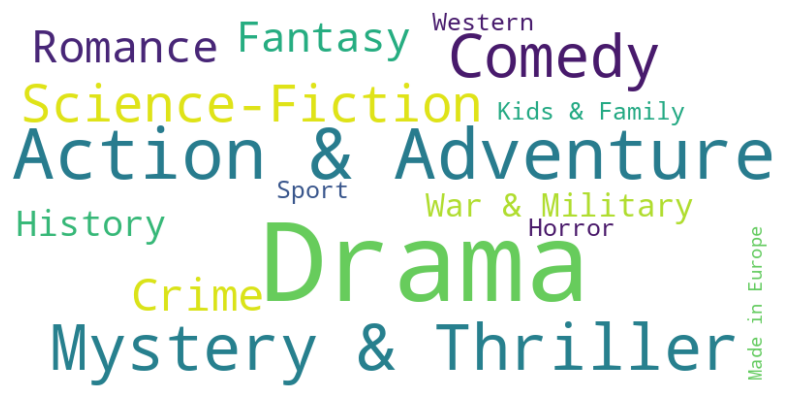

In [ ]:
#Let's Visualize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert genre_counts_sorted DataFrame to a dictionary
genre_counts_dict = dict(zip(genre_counts_sorted['Genres'], genre_counts_sorted['Count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(genre_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Note : The above image explains about the popularity of genres among the top 50 movies on the website. Bolder the genre more popular it is among the folks.

In [ ]:
# Group by "Genre" and count occurrences for Tv Shows

# split genres of each movie into individual genre and append to a list
all_Tv_show_genres = [genre.strip() for element in Tv_show_df["TV Show Genres"] for genre in element.split(",")]
all_Tv_show_genres_dict = {"Genres": all_Tv_show_genres}

# convert to dataframe
all_Tv_show_genres_count_df = pd.DataFrame(all_Tv_show_genres_dict)

# Group by Genre and count the occurrences
Tv_show_genre_counts = all_Tv_show_genres_count_df.groupby('Genres').size().reset_index(name='Count')

# Sort the DataFrame by Count column in descending order
Tv_show_genre_counts_sorted = Tv_show_genre_counts[["Genres", "Count"]].sort_values(by='Count', ascending=False)

Tv_show_genre_counts_sorted.head()

,Genres,Count
5,Drama,37
0,Action & Adventure,23
3,Crime,21
11,Mystery & Thriller,20
2,Comedy,14


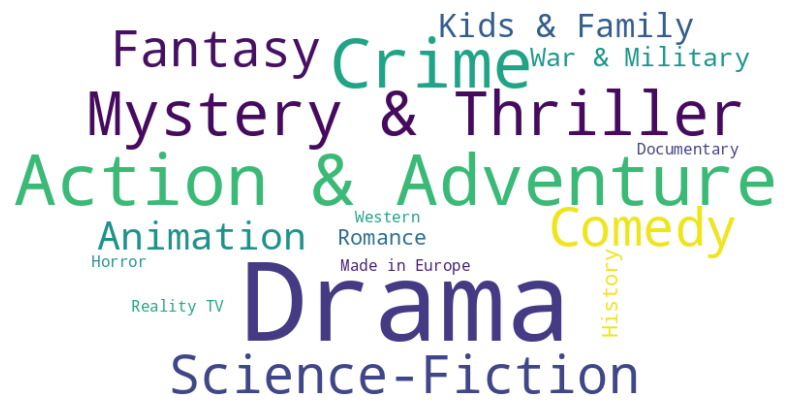

In [ ]:
#Let's Visualize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert genre_counts_sorted DataFrame to a dictionary
Tv_show_genre_counts_dict = dict(zip(Tv_show_genre_counts_sorted['Genres'], Tv_show_genre_counts_sorted['Count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(Tv_show_genre_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Note : The above image explains about the popularity of genres among the top 50 TV Shows on the website. Bolder the genre more popular it is among the folks.

## **Finding Predominant Streaming Service**

In [ ]:
# Group by "Streaming Platform" and count occurrences for movies

# split genres of each movie into individual genre and append to a list
all_movie_Stream = [Stream.strip() for element in movie_df["Movie Stream Services"] if element != None for Stream in element.split(",")]
all_movie_Stream_dict = {"Movie Stream Services": all_movie_Stream}

# convert to dataframe
all_movie_Stream_count_df = pd.DataFrame(all_movie_Stream_dict)

# Group by Genre and count the occurrences
Stream_counts = all_movie_Stream_count_df.groupby('Movie Stream Services').size().reset_index(name='Count')

# Sort the DataFrame by Count column in descending order
Stream_counts_sorted = Stream_counts[["Movie Stream Services", "Count"]].sort_values(by='Count', ascending=False)

Stream_counts_sorted.head()

,Movie Stream Services,Count
0,Amazon Prime Video,11
7,Netflix,11
3,Jio Cinema,3
9,Sun Nxt,2
10,Zee5,2


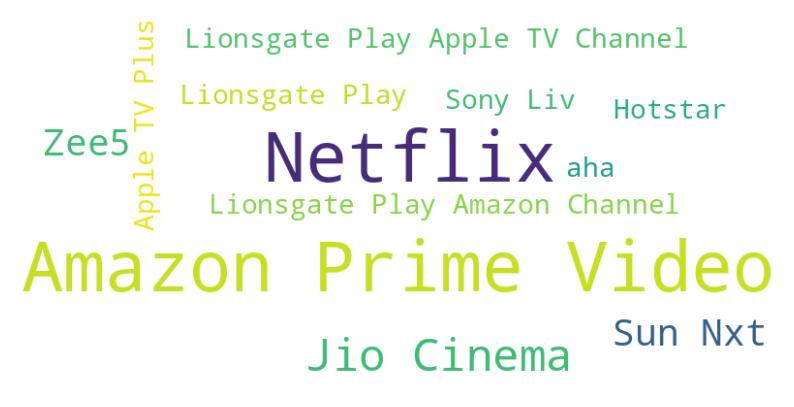

In [ ]:
#Let's Visualize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert genre_counts_sorted DataFrame to a dictionary
Stream_counts_dict = dict(zip(Stream_counts_sorted['Movie Stream Services'], Stream_counts_sorted['Count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(Stream_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Note : The above image explains about the popularity of streaming Services among the top 50 Movies on the website. Bolder the genre more popular it is among the folks.

In [ ]:
# Group by "Genre" and count occurrences for Tv Shows

# split genres of each movie into individual genre and append to a list
all_Tv_show_Stream = [Stream.strip() for element in Tv_show_df["TV Show Stream Services"] if element != None for Stream in element.split(",")]
all_Tv_show_Stream_dict = {"TV Show Stream Services": all_Tv_show_Stream}

# convert to dataframe
all_Tv_show_Stream_count_df = pd.DataFrame(all_Tv_show_Stream_dict)

# Group by Genre and count the occurrences
Tv_show_Stream_counts = all_Tv_show_Stream_count_df.groupby('TV Show Stream Services').size().reset_index(name='Count')

# Sort the DataFrame by Count column in descending order
Tv_show_Stream_counts_sorted = Tv_show_Stream_counts[["TV Show Stream Services", "Count"]].sort_values(by='Count', ascending=False)

Tv_show_Stream_counts_sorted.head()

,TV Show Stream Services,Count
7,Netflix,16
1,Amazon Prime Video,10
4,Hotstar,7
5,Jio Cinema,7
3,Crunchyroll,5


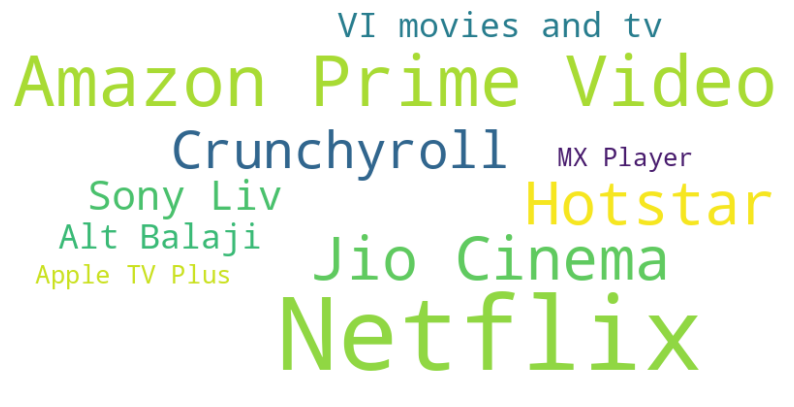

In [ ]:
#Let's Visualise it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert genre_counts_sorted DataFrame to a dictionary
Tv_show_Stream_counts_dict = dict(zip(Tv_show_Stream_counts_sorted['TV Show Stream Services'], Tv_show_Stream_counts_sorted['Count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(Tv_show_Stream_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Note : The above image explains about the popularity of streaming Services among the top 50 TV Shows on the website. Bolder the genre more popular it is among the folks.

## **Task 3 :- Data Export**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#saving final dataframe as Final Data in csv format
movie_df.to_csv("/content/drive/My Drive/Almabetter/Module 2/Top_50_Movies_DF.csv")

Tv_show_df.to_csv("/content/drive/My Drive/Almabetter/Module 2/Top_50_Tv_shows_DF.csv")


In [ ]:
#saving filter data as Filter Data in csv format
movies_last_2years.to_csv("/content/drive/My Drive/Almabetter/Module 2/Top_Movies_released_last_2years_DF.csv")

Tv_show_last_2years.to_csv("/content/drive/My Drive/Almabetter/Module 2/Top_TV_shows_released_last_2years_DF.csv")

movies_rating_7.to_csv("/content/drive/My Drive/Almabetter/Module 2/Movies_IMDB_rating_above7_DF.csv")

Tv_show_rating_7.to_csv("/content/drive/My Drive/Almabetter/Module 2/TV_shows_IMDB_rating_above7_DF.csv")

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***